<a href="https://colab.research.google.com/github/yskim1230/AIB_Section2-PJT_Modeling-Plan/blob/main/Section_2_Project_modeling(tree_base).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 트리모델

In [3]:
# 라이브러리 설치
# 원핫인코딩을 위해 category_encoders 라이브러리를 설치해줍니다.
!pip install category_encoders
!pip install pandas-profiling==3.1.0
# 해당 라이브러리 설치 후 런타임 다시 시작 -> 이후 셀 진행
!pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.1/303.1 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.2 MB/s eta 0:00:00
  Attempting uninstall: tangled-up-in-unicode
    Found existing installation: tangled-up-in-unicode 0.2.0
    Uninstalling tangled-up-in-unicode-0.2.0:
      Successfully uninstalled tangled-up-in-unicode-0.2.0
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.2
    Uninstalling MarkupSafe-2.1.2:
      Successfully uninstalled MarkupSafe-2.1.2
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
  Attempting uninstall: panda

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

데이터 불러오기

In [2]:
naver_shop = pd.read_csv('https://raw.githubusercontent.com/yskim1230/AIB_Section2-PJT_Modeling-Plan/main/naver_shop_FE_comp.csv')

In [3]:
naver_shop 

,Title,Low price,Mall Name,Product Type,Maker,Brand,category1,category2,category3,Price_range,Maker Point,Brand Point,Price_range_score,Total Point
0,지오다노 372513,21930,네이버,1,지오다노,지오다노,패션의류,여성의류,레인코트,Very Cheap,1,3,2,7
1,모이몰른 아동 장화 아기옷 어린이집등원룩,35000,모이몰른에덴,2,한세드림,모이몰른,출산/육아,유아동의류,레인코트,Very Cheap,1,1,2,4
2,EVA,10900,SABU,2,No-Maker,NO-Brand,패션의류,남성의류,레인코트,Very Cheap,0,0,2,2
3,날씨요정 아기공룡 유아 장화세트,23800,날씨요정,2,No-Maker,날씨요정,출산/육아,유아동의류,레인코트,Very Cheap,0,1,2,3
4,유가모아 어린이 판초 키즈 아동 여아 남아,15900,유가모아,2,No-Maker,NO-Brand,출산/육아,유아동의류,레인코트,Very Cheap,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16421,아디다스 여성 기능성 반팔,16400,스포츠전문몰,2,아디다스,아디다스,패션의류,여성의류,티셔츠,Very Cheap,1,3,2,7
16422,JORDAN 조던 주니어 보이 짐23 반팔 N232TS392P,35000,네이버,1,나이키,JORDAN,출산/육아,유아동의류,티셔츠,Very Cheap,1,3,2,7
16423,타미힐피거 여성 라운드넥 5버튼 스몰 플래그 골지 긴팔 2컬러 76J3182,29400,네이버,1,타미힐피거,타미힐피거,패션의류,여성의류,티셔츠,Very Cheap,1,3,2,7
16424,온앤온 브이넥 반팔 JW2ME507,14700,네이버,1,No-Maker,온앤온,패션의류,여성의류,티셔츠,Very Cheap,0,3,2,6


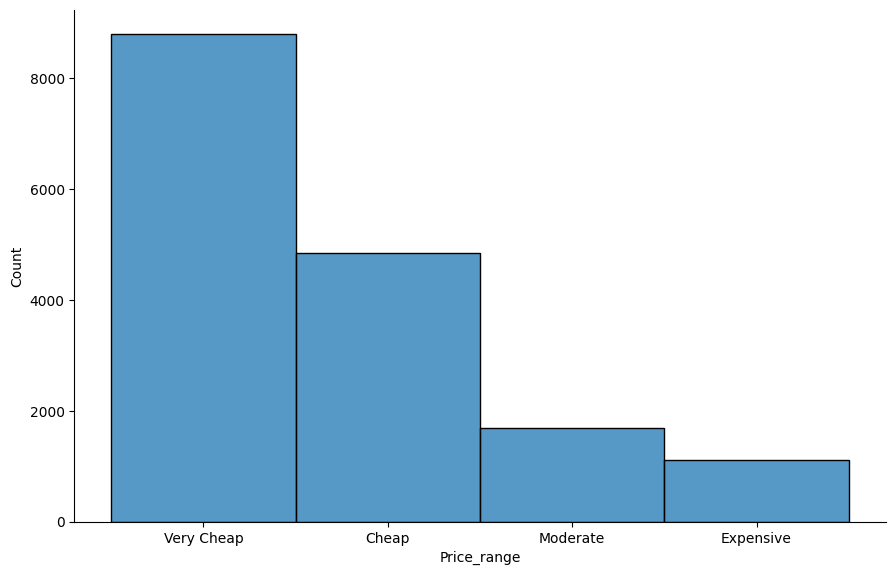

In [6]:
# 가격예측이 목적이므로 타겟은 Price_range	
target = 'Price_range'

# 타겟이 범주형데이터이므로 분류문제로 해결
import seaborn as sns
import matplotlib.pyplot as plt
fig = sns.displot(naver_shop[target])
fig.fig.set_size_inches(10,6)

In [10]:
naver_shop[target].value_counts(normalize=True)

Very Cheap    0.535614
Cheap         0.294594
Moderate      0.102460
Expensive     0.067332
Name: Price_range, dtype: float64